<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Read the dataset
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(URL)


<class 'urllib.error.URLError'>: <urlopen error [Errno 23] Host is unreachable>

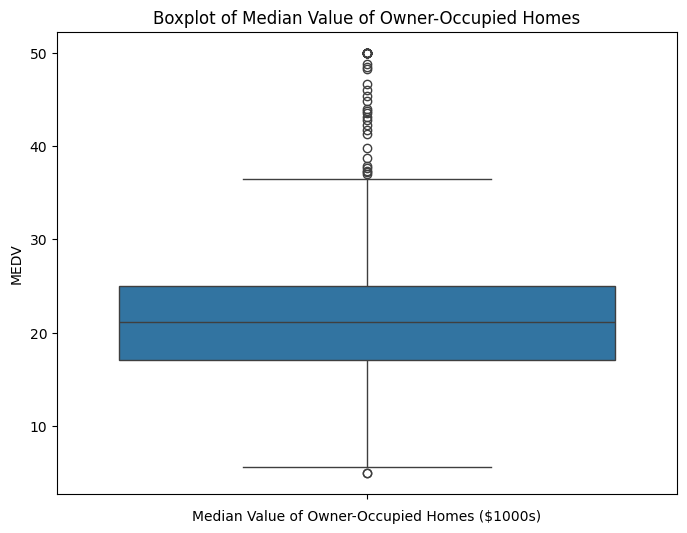

In [25]:
# Boxplot for MEDV
plt.figure(figsize=(8,6))
sns.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()


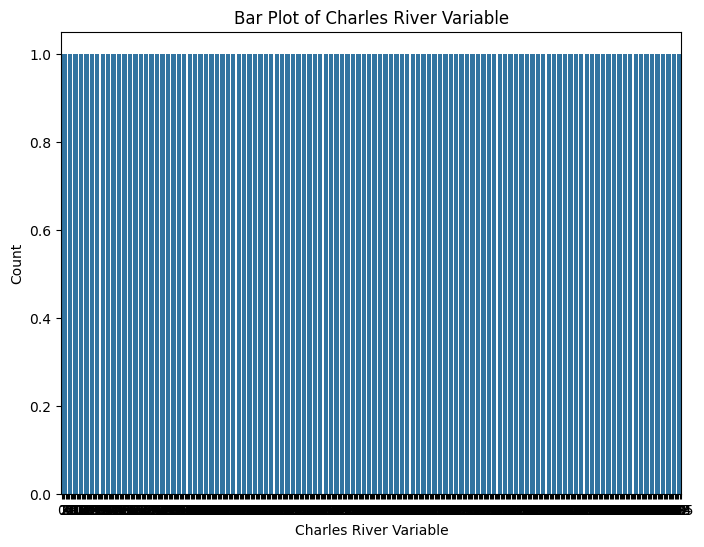

In [23]:
# Bar plot for CHAS
plt.figure(figsize=(8,6))
sns.countplot(boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River Variable')
plt.ylabel('Count')
plt.show()


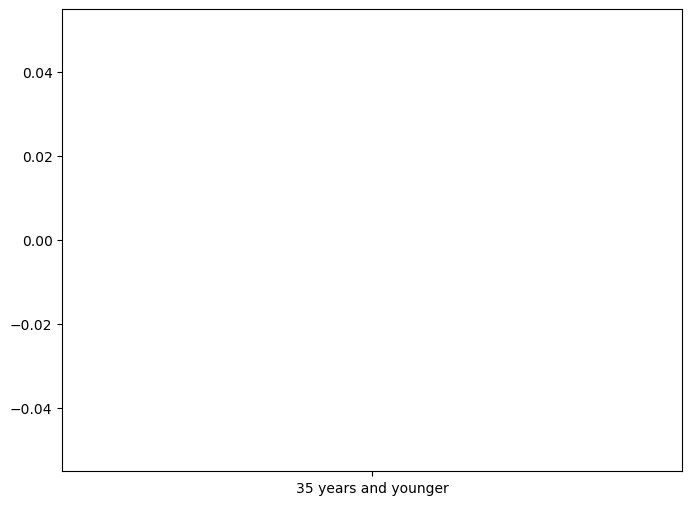

<class 'ValueError'>: List of boxplot statistics and `positions` values must have same the length

In [26]:
# Discretize the AGE variable
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 0.35, 0.7, 1], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

# Boxplot for MEDV vs AGE
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE')
plt.xlabel('AGE Group')
plt.ylabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.show()


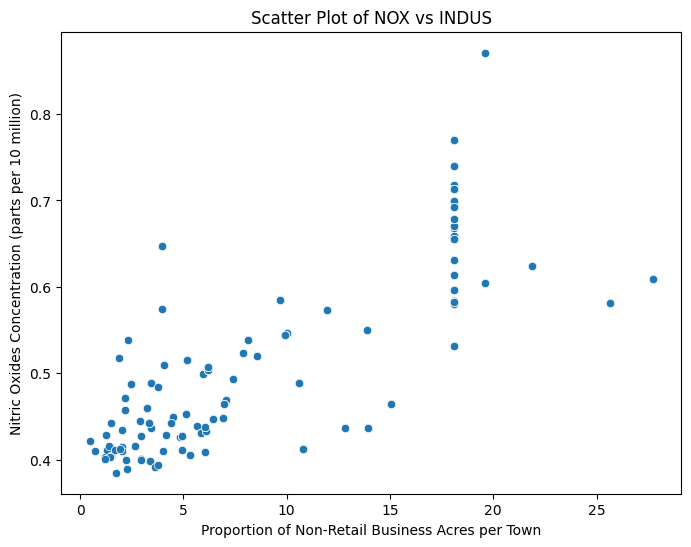

In [27]:
# Scatter plot for NOX and INDUS
plt.figure(figsize=(8,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxides Concentration (parts per 10 million)')
plt.show()


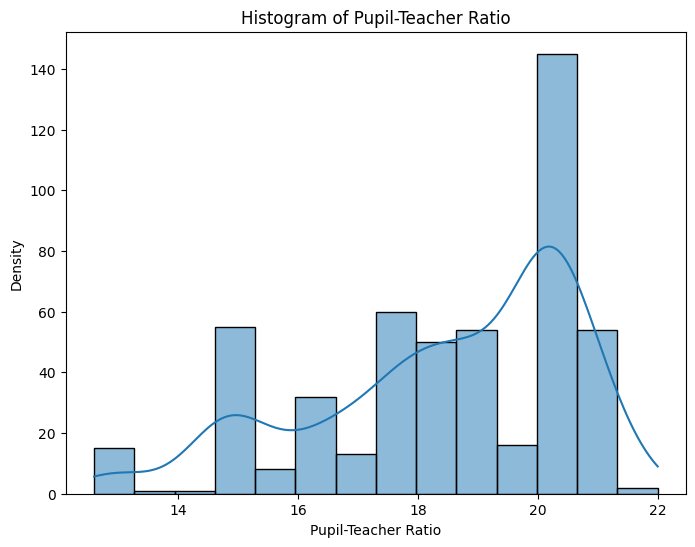

In [28]:
# Histogram for PTRATIO
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Density')
plt.show()


In [29]:
# T-test for independent samples
charles_river_df = boston_df[boston_df['CHAS'] == 0]
not_charles_river_df = boston_df[boston_df['CHAS'] == 1]

# Hypothesis: The median value of houses bounded by the Charles river is different from those not bounded.
# Null hypothesis: The median value of houses bounded by the Charles river is not different from those not bounded.

t_stat, p_val = scipy.stats.ttest_ind(charles_river_df['MEDV'], not_charles_river_df['MEDV'])

print(f'T-statistic: {t_stat}, p-value: {p_val}')

if p_val < 0.05:
    print('Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river or not.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in median value of houses bounded by the Charles river or not.')


T-statistic: -3.996437466090509, p-value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river or not.


In [33]:
# ANOVA
# Hypothesis: There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940.
# Null hypothesis: There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940.

f_stat, p_val = scipy.stats.f_oneway(boston_df[boston_df['AGE'] < 0.35]['MEDV'], 
                                    boston_df[(boston_df['AGE'] >= 0.35) & (boston_df['AGE'] < 0.7)]['MEDV'], 
                                    boston_df[boston_df['AGE'] >= 0.7]['MEDV'])

print(f,F)

<ipython-input-33-5ad314c34a6e>:5: DegenerateDataWarning: at least one input has length 0
  f_stat, p_val = scipy.stats.f_oneway(boston_df[boston_df['AGE'] < 0.35]['MEDV'],


<class 'NameError'>: name 'f' is not defined